In [2]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [3]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [4]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.6325301204819277, 1: 2.3863636363636362}

In [6]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['incident_hour_of_the_day',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'insured_zip',
  'policy_number',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'vehicle_claim'],
 'LDA': ['incident_severity',
  'injury_claim',
  'insured_sex',
  'insured_zip',
  'policy_annual_premium',
  'policy_number',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'vehicle_claim'],
 'DTC': ['auto_model',
  'incident_location',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_zip',
  'month_policy_bind_date',
  'policy_annual_premium',
  'policy_number',
  'total_claim_amount'],
 'RD': ['day_incident_date',
  'incident_location',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_zip',
  'policy_annual_premium',
  'policy_number',
  'property_claim',
  'total_claim_amount'],
 'KNC': ['age',
  'policy_number',
  'insured_sex',
  'insured_occupation',
  'incident_severity',
  'incident_city',
  'prope

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [7]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 75.238% (2.484%)
Accuracy LDA: 83.048% (2.439%)
Accuracy DTC: 80.190% (3.036%)
Accuracy RD: 81.905% (2.825%)
Accuracy KNC: 79.048% (2.694%)
Accuracy NB: 78.857% (3.321%)
Accuracy SVM: 69.714% (1.942%)
Accuracy NN: 81.714% (2.721%)
Accuracy BG: 80.190% (1.400%)


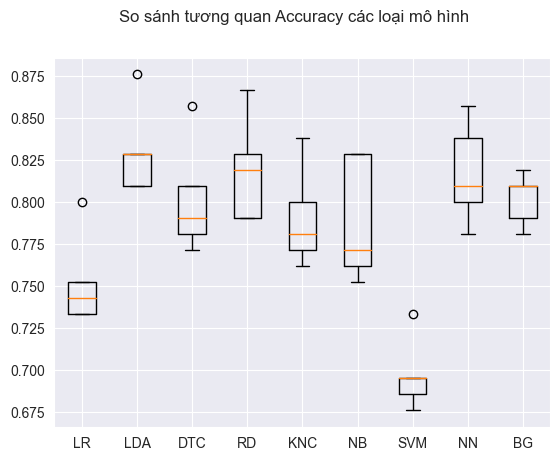

Precision LR: 44.993% (6.091%)
Precision LDA: 65.692% (13.958%)
Precision DTC: 57.277% (8.080%)
Precision RD: 63.864% (12.069%)
Precision KNC: 0.000% (0.000%)
Precision NB: 50.238% (6.026%)
Precision SVM: 38.388% (4.169%)
Precision NN: 62.357% (13.761%)
Precision BG: 53.749% (8.776%)


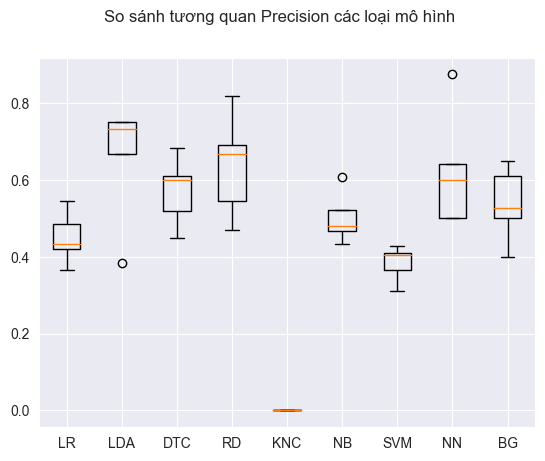

Recall LR: 74.598% (8.079%)
Recall LDA: 38.828% (11.090%)
Recall DTC: 52.755% (7.715%)
Recall RD: 35.501% (9.084%)
Recall KNC: 0.000% (0.000%)
Recall NB: 61.116% (9.124%)
Recall SVM: 72.366% (5.553%)
Recall NN: 41.401% (8.583%)
Recall BG: 45.203% (12.558%)


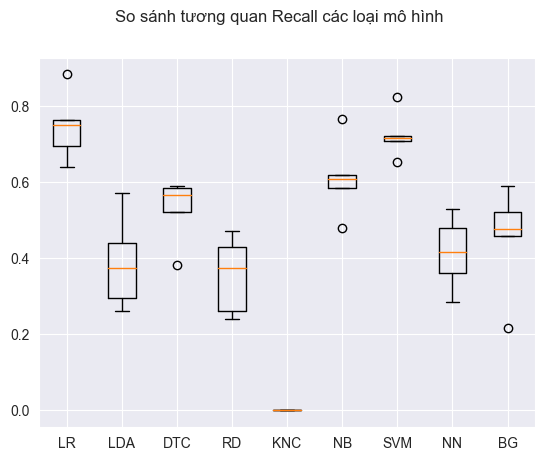

F1 LR: 55.525% (3.982%)
F1 LDA: 48.140% (11.512%)
F1 DTC: 52.414% (7.252%)
F1 RD: 44.509% (8.140%)
F1 KNC: 0.000% (0.000%)
F1 NB: 54.559% (4.501%)
F1 SVM: 49.792% (2.676%)
F1 NN: 48.077% (8.491%)
F1 BG: 47.616% (9.289%)


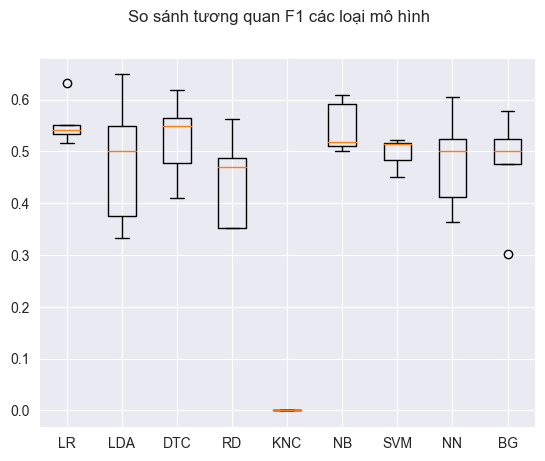

In [23]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


## 3 Mô hình đạt điểm cao nhất là:
	-LR:  Logistic Regression
    -DTC: DecisionTreeClassifer
    -NB:  Muitional NB
    

In [18]:
evaluate_result={}

### LogisticRegression

In [19]:
supervied_features=x_train[feature_selection['LR']]
supervied_target=y_train
model=LogisticRegression(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

LogisticRegression(class_weight={0: 0.6325301204819277, 1: 2.3863636363636362})

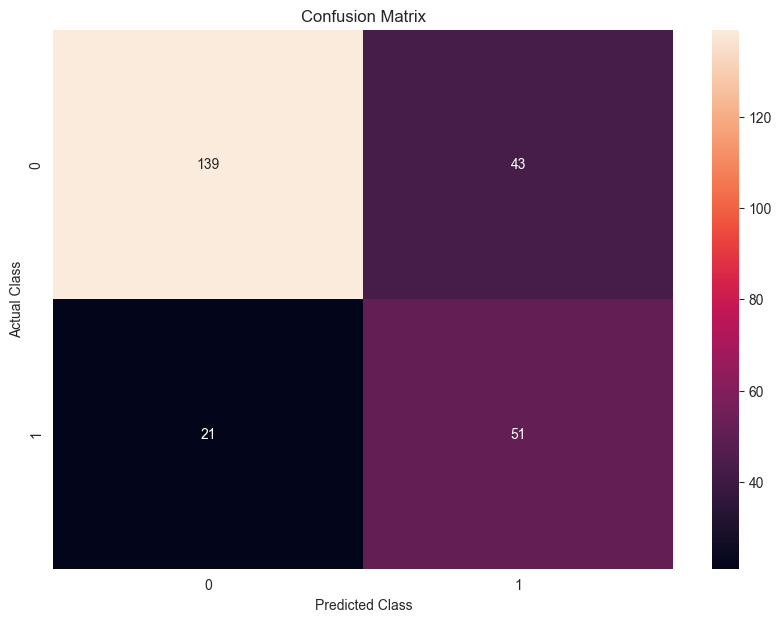

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       182
           1       0.54      0.71      0.61        72

    accuracy                           0.75       254
   macro avg       0.71      0.74      0.71       254
weighted avg       0.78      0.75      0.76       254



In [20]:
predictions = model.predict(x_test[feature_selection['LR']])
conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LogisticRegression']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### MultinomialNB


In [25]:
supervied_features=x_train[feature_selection['NB']]
supervied_target=y_train
model=MultinomialNB()
model.fit(supervied_features,supervied_target)

MultinomialNB()

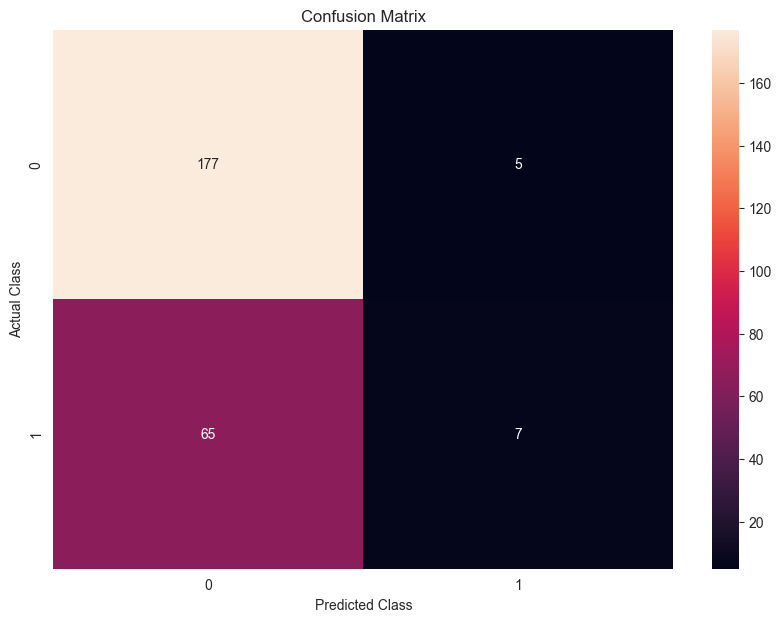

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       182
           1       0.58      0.10      0.17        72

    accuracy                           0.72       254
   macro avg       0.66      0.53      0.50       254
weighted avg       0.69      0.72      0.65       254



In [26]:
predictions = model.predict(x_test[feature_selection['NB']])

cconf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['MultinomialNB']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### DecisionTreeClassifer

In [37]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.6325301204819277,
                                     1: 2.3863636363636362})

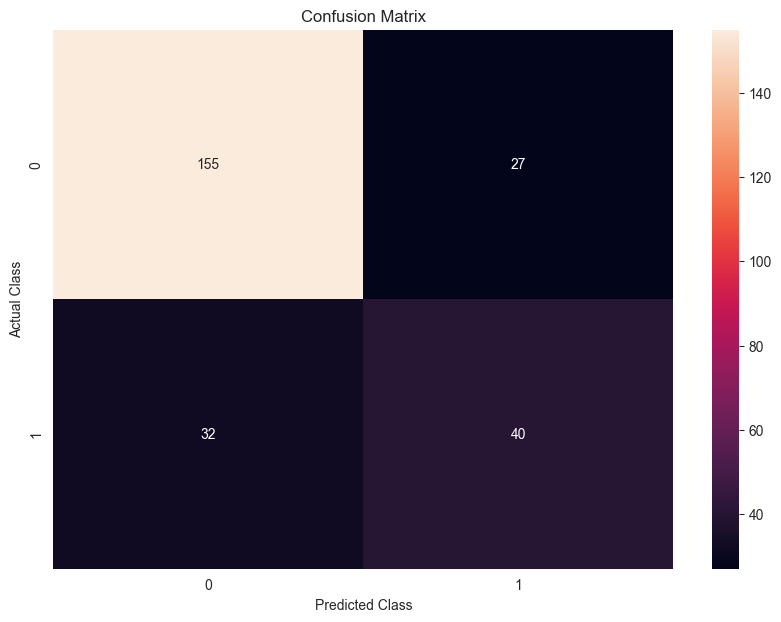

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       182
           1       0.60      0.56      0.58        72

    accuracy                           0.77       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.76      0.77      0.77       254



In [38]:
predictions = model.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

In [41]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.76      0.81       182
           1       0.54      0.71      0.61        72

    accuracy                           0.75       254
   macro avg       0.71      0.74      0.71       254
weighted avg       0.78      0.75      0.76       254

GaussianNB
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       182
           1       0.47      0.44      0.46        72

    accuracy                           0.70       254
   macro avg       0.63      0.62      0.63       254
weighted avg       0.70      0.70      0.70       254

MultinomialNB
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       182
           1       0.58      0.10      0.17        72

    accuracy                           0.72       254
   macro avg       0.66      0.53      0.50       254
weighted avg       0.69      0

In [52]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [53]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [54]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: N
Predicted: N
----------------------------
Lần thứ 2: 
True: N
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: N
Predicted: N
----------------------------
Lần thứ 5: 
True: Y
Predicted: N
----------------------------
Lần thứ 6: 
True: N
Predicted: N
----------------------------
Lần thứ 7: 
True: N
Predicted: N
----------------------------
Lần thứ 8: 
True: N
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: N
----------------------------
Lần thứ 10: 
True: N
Predicted: Y
----------------------------


In [55]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 8 chiếm khoảng 80.0% tổng lần dự đoán


In [56]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


In [57]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 189 chiếm khoảng 74.40944881889764% tổng lần dự đoán
